In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
training_data_x = pd.read_pickle('../Kepler-Train.pkl')

     id  time      FLUX
603   3     0 -0.053581
604   3     1 -0.456898
605   3     2 -0.467286
606   3     3 -0.081283
607   3     4 -0.053034
..   ..   ...       ...
799   3   196 -0.347549
800   3   197 -0.658283
801   3   198 -0.366320
802   3   199 -0.043193
803   3   200  0.609623

[201 rows x 3 columns]


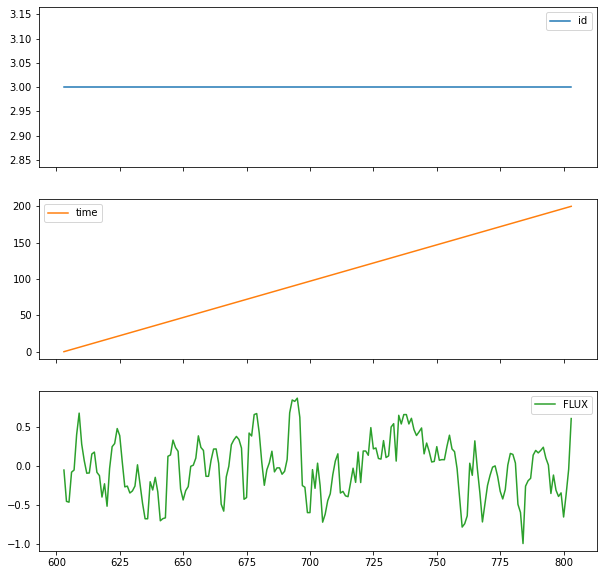

In [3]:
print(training_data_x[training_data_x['id'] == 3])
training_data_x[training_data_x['id'] == 3].plot(subplots=True, sharex=True, figsize=(10,10))
plt.show()

In [4]:
from tsfresh import extract_features
from tsfresh.feature_extraction import MinimalFCParameters, EfficientFCParameters

extracted_features = extract_features(training_data_x, column_id= "id", column_sort= "time", 
                                      column_value= "FLUX", default_fc_parameters= EfficientFCParameters())
with open("nanlist.txt") as file:
    for readline in file: 
        line_strip = readline.strip()
        extracted_features.drop(line_strip, axis=1, inplace=True)
extracted_features.to_pickle("./TS-Train.pkl")

Feature Extraction: 100%|██████████| 10/10 [08:05<00:00, 48.52s/it]


In [5]:
extracted_features

,FLUX__variance_larger_than_standard_deviation,FLUX__has_duplicate_max,FLUX__has_duplicate_min,FLUX__has_duplicate,FLUX__sum_values,FLUX__abs_energy,FLUX__mean_abs_change,FLUX__mean_change,FLUX__mean_second_derivative_central,FLUX__median,...,FLUX__fourier_entropy__bins_2,FLUX__fourier_entropy__bins_3,FLUX__fourier_entropy__bins_5,FLUX__fourier_entropy__bins_10,FLUX__fourier_entropy__bins_100,FLUX__permutation_entropy__dimension_3__tau_1,FLUX__permutation_entropy__dimension_4__tau_1,FLUX__permutation_entropy__dimension_5__tau_1,FLUX__permutation_entropy__dimension_6__tau_1,FLUX__permutation_entropy__dimension_7__tau_1
0,0.0,0.0,0.0,1.0,-32.102301,24.667409,0.017086,-0.000003,0.000008,0.0,...,0.097267,0.152615,0.207861,0.276730,0.331771,1.619692,2.616500,3.522927,4.200931,4.561528
1,0.0,0.0,0.0,1.0,-14.811882,11.867550,0.013683,-0.000009,-0.000005,0.0,...,0.197055,0.266507,0.340350,0.455087,0.605389,1.675749,2.781149,3.807853,4.471963,4.835615
2,0.0,0.0,0.0,1.0,18.489829,62.959598,0.059967,-0.001180,0.000213,0.0,...,0.097267,0.110993,0.207861,0.221586,0.331771,1.741052,3.019429,4.096632,4.734158,5.082794
3,0.0,0.0,0.0,1.0,-3.577547,27.090369,0.200054,0.003316,0.002654,0.0,...,0.133708,0.188954,0.340350,0.600752,2.032070,1.686651,2.851223,3.968921,4.712940,5.111230
4,0.0,0.0,0.0,1.0,-19.118616,19.440698,0.057368,-0.000653,-0.000069,0.0,...,0.133708,0.133708,0.249279,0.304320,0.699621,1.709707,2.927428,4.002302,4.648504,5.006335
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12584,0.0,0.0,0.0,1.0,0.668162,29.765791,0.193655,0.003655,-0.000913,0.0,...,0.055546,0.055546,0.280266,0.622431,1.889528,1.718830,2.897511,3.984912,4.731570,5.135241
12585,0.0,0.0,0.0,1.0,-22.558989,25.231070,0.049930,-0.000365,0.000099,0.0,...,0.097267,0.097267,0.152615,0.263004,0.427813,1.719543,2.846081,3.898795,4.622202,4.963680
12586,0.0,0.0,0.0,1.0,-13.822440,17.229653,0.058637,0.001756,0.000537,0.0,...,0.166683,0.230372,0.249279,0.359256,0.688574,1.668577,2.769000,3.814093,4.530901,4.913540
12587,0.0,0.0,0.0,1.0,-17.218510,53.981214,0.065750,-0.000274,-0.000003,0.0,...,0.055546,0.152615,0.166340,0.166340,0.166340,1.709074,2.922349,4.113752,4.821350,5.136984


In [6]:
testing_data_x = pd.read_pickle('../Kepler-Test.pkl')
extracted_features = extract_features(testing_data_x, column_id= "id", column_sort= "time", 
                                      column_value= "FLUX", default_fc_parameters= EfficientFCParameters())
with open("nanlist.txt") as file:
    for readline in file: 
        line_strip = readline.strip()
        extracted_features.drop(line_strip, axis=1, inplace=True)
extracted_features.to_pickle("./TS-Test.pkl")

Feature Extraction: 100%|██████████| 10/10 [01:01<00:00,  6.11s/it]


In [7]:
extracted_features

,FLUX__variance_larger_than_standard_deviation,FLUX__has_duplicate_max,FLUX__has_duplicate_min,FLUX__has_duplicate,FLUX__sum_values,FLUX__abs_energy,FLUX__mean_abs_change,FLUX__mean_change,FLUX__mean_second_derivative_central,FLUX__median,...,FLUX__fourier_entropy__bins_2,FLUX__fourier_entropy__bins_3,FLUX__fourier_entropy__bins_5,FLUX__fourier_entropy__bins_10,FLUX__fourier_entropy__bins_100,FLUX__permutation_entropy__dimension_3__tau_1,FLUX__permutation_entropy__dimension_4__tau_1,FLUX__permutation_entropy__dimension_5__tau_1,FLUX__permutation_entropy__dimension_6__tau_1,FLUX__permutation_entropy__dimension_7__tau_1
0,0.0,0.0,0.0,1.0,-13.674953,13.471979,0.053340,0.000417,3.064100e-05,0.0,...,0.166683,0.194135,0.249279,0.304320,0.537155,1.675338,2.791597,3.841275,4.563655,4.955630
1,0.0,0.0,0.0,1.0,-8.454327,63.934799,0.058373,-0.003429,-2.899111e-04,0.0,...,0.097267,0.097267,0.152615,0.221586,0.221586,1.647424,2.735878,3.630984,4.244023,4.631727
2,0.0,0.0,0.0,1.0,-14.315349,10.809434,0.011592,0.000006,4.877862e-07,0.0,...,0.197055,0.266507,0.340350,0.468812,0.659787,1.642320,2.707981,3.759793,4.490394,4.924720
3,0.0,0.0,1.0,1.0,-4.934426,49.977913,0.104026,-0.002821,1.889875e-04,0.0,...,0.055546,0.152615,0.152615,0.152615,0.559031,1.665146,2.796702,3.887249,4.573444,4.974711
4,0.0,0.0,0.0,1.0,-23.021904,19.573243,0.023922,-0.000035,-5.870473e-06,0.0,...,0.133708,0.194135,0.207861,0.318045,0.441539,1.606894,2.667641,3.653383,4.324096,4.700058
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1569,0.0,0.0,0.0,1.0,-16.005780,62.955930,0.051792,-0.000350,-2.001885e-04,0.0,...,0.055546,0.055546,0.152615,0.152615,0.166340,1.681801,2.812594,3.650884,4.253027,4.648072
1570,0.0,0.0,0.0,1.0,11.640734,40.007958,0.269528,0.002439,9.488000e-04,0.0,...,0.097267,0.097267,0.166340,0.263004,1.175737,1.780393,3.122185,4.416885,5.081806,5.223235
1571,0.0,0.0,0.0,1.0,-7.175416,29.309859,0.140190,-0.003344,9.465063e-04,0.0,...,0.097267,0.110993,0.110993,0.110993,0.427635,1.495218,2.253349,2.931106,3.534942,4.071721
1572,0.0,0.0,0.0,1.0,0.658602,38.364702,0.100833,0.004059,-4.052517e-05,0.0,...,0.097267,0.097267,0.097267,0.097267,0.742363,1.642648,2.681849,3.606504,4.324167,4.841507


In [8]:
validation_data_x = pd.read_pickle('../Kepler-Val.pkl')
extracted_features = extract_features(validation_data_x, column_id= "id", column_sort= "time", 
                                      column_value= "FLUX", default_fc_parameters= EfficientFCParameters())
with open("nanlist.txt") as file:
    for readline in file: 
        line_strip = readline.strip()
        extracted_features.drop(line_strip, axis=1, inplace=True)
extracted_features.to_pickle("./TS-Val.pkl")

Feature Extraction: 100%|██████████| 10/10 [01:00<00:00,  6.06s/it]


In [9]:
extracted_features

,FLUX__variance_larger_than_standard_deviation,FLUX__has_duplicate_max,FLUX__has_duplicate_min,FLUX__has_duplicate,FLUX__sum_values,FLUX__abs_energy,FLUX__mean_abs_change,FLUX__mean_change,FLUX__mean_second_derivative_central,FLUX__median,...,FLUX__fourier_entropy__bins_2,FLUX__fourier_entropy__bins_3,FLUX__fourier_entropy__bins_5,FLUX__fourier_entropy__bins_10,FLUX__fourier_entropy__bins_100,FLUX__permutation_entropy__dimension_3__tau_1,FLUX__permutation_entropy__dimension_4__tau_1,FLUX__permutation_entropy__dimension_5__tau_1,FLUX__permutation_entropy__dimension_6__tau_1,FLUX__permutation_entropy__dimension_7__tau_1
0,0.0,0.0,0.0,1.0,18.334008,70.241964,0.131322,-0.002658,-8.646472e-05,0.0,...,0.097267,0.097267,0.110993,0.166340,0.511988,1.685180,2.843109,3.967877,4.700567,5.091290
1,0.0,0.0,0.0,1.0,-14.795203,11.379647,0.010290,0.000006,4.089423e-07,0.0,...,0.197055,0.266507,0.345530,0.482538,0.659787,1.676671,2.766220,3.747690,4.410125,4.732987
2,0.0,0.0,0.0,1.0,6.739202,36.168926,0.045816,0.000403,4.088559e-06,0.0,...,0.055546,0.188954,0.276868,0.359256,0.700349,1.446888,2.161038,2.615809,2.919058,3.148879
3,0.0,0.0,1.0,1.0,-9.959459,44.843681,0.086419,-0.001486,-5.602335e-04,0.0,...,0.055546,0.188954,0.207861,0.340350,0.845228,1.697012,2.676584,3.585509,4.270611,4.732956
4,0.0,0.0,0.0,1.0,3.172804,48.624493,0.098626,-0.000482,1.565904e-04,0.0,...,0.097267,0.097267,0.110993,0.166340,0.318045,1.752112,3.006756,4.140292,4.806851,5.105864
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1569,0.0,0.0,0.0,1.0,6.597677,35.482043,0.043132,-0.005225,-9.711544e-05,0.0,...,0.097267,0.110993,0.166340,0.166340,0.331771,1.677720,2.820253,3.865661,4.584691,4.976957
1570,0.0,0.0,0.0,1.0,-15.118466,17.629109,0.121869,0.001221,-4.787003e-04,0.0,...,0.166683,0.188954,0.304320,0.400362,1.316746,1.765975,2.981652,4.109865,4.887676,5.206333
1571,0.0,0.0,0.0,1.0,-7.285671,11.210699,0.080036,-0.000754,-2.927220e-04,0.0,...,0.166683,0.230372,0.345530,0.414087,1.051493,1.675479,2.810417,3.885814,4.612373,5.036514
1572,0.0,0.0,0.0,1.0,-11.180654,10.231146,0.077280,-0.000836,3.770631e-04,0.0,...,0.166683,0.230372,0.263004,0.359256,1.369187,1.708327,2.899856,4.045412,4.744780,5.043269
